## Pinhole Camera

|||
|---|---|
|<img src="../../resources/Pinhole.svg.png" style="background-color: white;" width="300" alt="Alternative text" />|<img src="../../resources/Pinhole2.svg.png" style="background-color: white;" width="450" alt="Alternative text" />|
https://en.wikipedia.org/wiki/Pinhole_camera_model

- Direction of ray
    - From P to O to Q. 
- Formulation
$$
\begin{align*}
y_1 &= -\frac{fx_1}{x_3}\\
y_2 &= -\frac{fx_2}{x_3}\\
\begin{pmatrix}
y_1 \\ y_2
\end{pmatrix} &= -\frac{f}{x_3}
\begin{pmatrix}
y_1 \\ y_2
\end{pmatrix}
\end{align*}
$$
- O is the optical center, if the image plane sits behind the optical center and the object, it is called the real image plane.

<img src="../../resources/pinholecam1.png">
https://www.scratchapixel.com/lessons/3d-basic-rendering/3d-viewing-pinhole-camera/virtual-pinhole-camera-model.html

- Image plane at the same side of the object and in front of the optical center is the virtual image plane.
$$
\begin{align*}
\begin{pmatrix}
y_1 \\ y_2
\end{pmatrix} &= +\frac{f}{x_3}
\begin{pmatrix}
y_1 \\ y_2
\end{pmatrix}
\end{align*}
$$

|||
|---|---|
|<img src="../../resources/Pinhole-Camera-Model-ideal-projection-of-a-3D-object-on-a-2D-image.png" width="350"/>|<img src="../../resources/3-s2.0-B9780128123096000038-f03-19-9780128123096.jpg" width="500"/>|
- https://www.sciencedirect.com/topics/engineering/pinhole-camera-model
- https://www.cs.cmu.edu/~16385/s17/Slides/11.1_Camera_matrix.pdf

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
H, W, f = 400, 400, 1200

In [3]:
rays_o = np.zeros((H*W,3))
rays_d = np.zeros((H*W,3))
u = np.arange(H)
v = np.arange(W)
print(u.shape, v.shape)
u,v = np.meshgrid(u,v)
print(u[:5,:5])
print(v[:5,:5])
print(u.shape,v.shape)

(400,) (400,)
[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]
[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]
 [4 4 4 4 4]]
(400, 400) (400, 400)


- The $u,v$ variables represent the $u,v$ coordinates on the image plane. 
$$
\begin{pmatrix}
(u=0,v=0) & \cdots & (199, 0) & \cdots & (399,0) \\
\vdots & \ddots & \vdots& \ddots & \vdots \\
(0,199) & \ddots & (199,199) & \ddots & (399,199) \\
\vdots & \ddots & \vdots& \ddots & \vdots \\
(0,399) & \ddots & (199,399) & \ddots & (399,399) \\
\end{pmatrix}
$$

In [4]:
dirs = np.stack(((u-W/2), 
               -(v-H/2),
               -np.ones_like(u)*f), 
                axis=-1) # depth fo focal length
rays_d = dirs/np.linalg.norm(dirs,$ 3)
print(rays_d.shape)

(400, 400, 3)
(160000, 3)


- The direction array represent the direction from origin to image plane, so it is required to be image center. 
$$
\begin{pmatrix}
(u=-199,v=199) & \cdots & (0, 199) & \cdots & (199,199) \\
\vdots & \ddots & \vdots& \ddots & \vdots \\
(-199,0) & \ddots & (0,0) & \ddots & (199,0) \\
\vdots & \ddots & \vdots& \ddots & \vdots \\
(-199,-199) & \ddots & (0,-199) & \ddots & (199,-199) \\
\end{pmatrix}
$$

In [5]:
def plot_rays(o, d, t, every=100): 
    '''
    o: origin
    d: direction
    t: scalar (like a time)
    '''
    fig = plt.figure(figsize=(12,12))
    ax = plt.axes(projection='3d')
    pt1 = o
    pt2 = o+t*d
    
    for p1,p2 in zip(pt1[::every], pt2[::every]):
        ax.plot([p1[0],p2[0]],
                [p1[1],p2[1]],
                [p1[2],p2[2]])
        
    plt.show()

- O is the origin of following image. (0, 0, 0) It represents center of projection. 
- The end of the rays is on the image plane. 

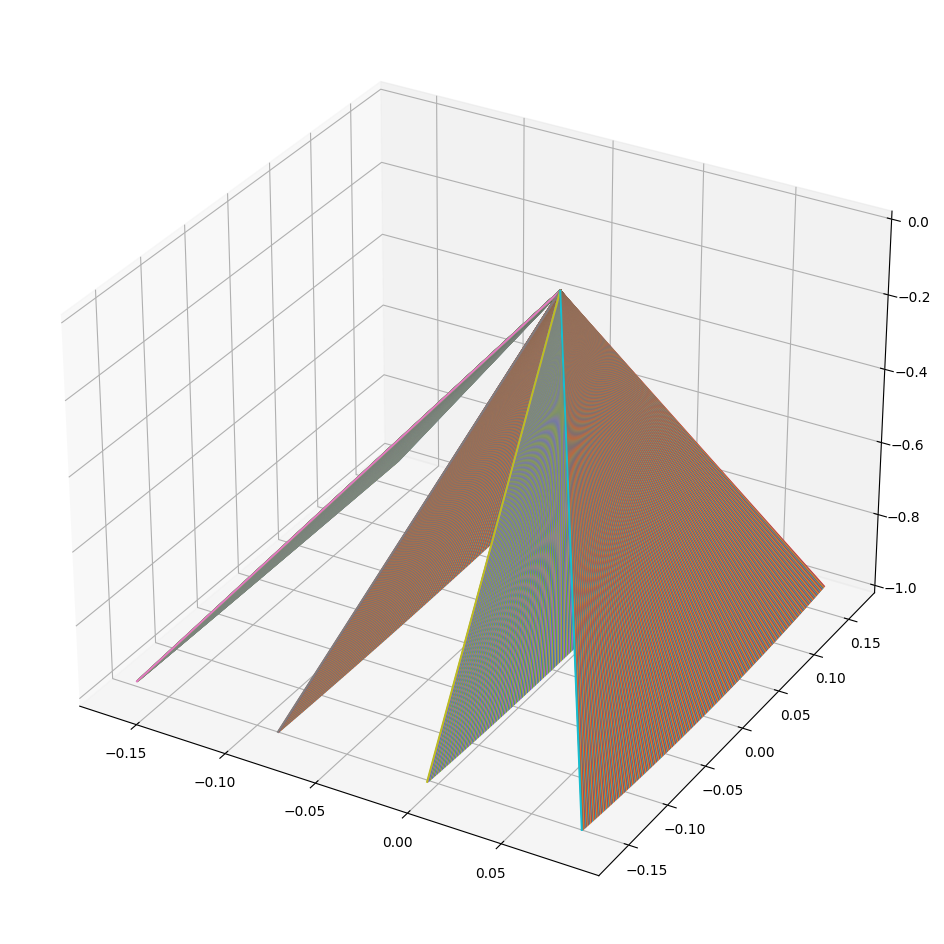

In [7]:
plot_rays(rays_o, rays_d, 1, every=100)